page six code

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/olist_orders_dataset.csv')

# Display the first few rows of the dataframe to understand its structure
df.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [6]:
# Convert 'order_purchase_timestamp' to datetime
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

# Extract year and month from 'order_purchase_timestamp'
df['year'] = df['order_purchase_timestamp'].dt.year
df['month'] = df['order_purchase_timestamp'].dt.month_name()

# Check the unique values in 'year' to ensure they align with the graph's years
unique_years = df['year'].unique()

# Group by year and month, then count unique customer IDs
monthly_customer_trend = df.groupby(['year', 'month'])['customer_id'].nunique().reset_index()

# Pivot the data to have months as columns and years as rows
monthly_customer_trend_pivot = monthly_customer_trend.pivot(index='year', columns='month', values='customer_id')

# Order the months correctly
ordered_months = ["January", "February", "March", "April", "May", "June",
                  "July", "August", "September", "October", "November", "December"]
monthly_customer_trend_pivot = monthly_customer_trend_pivot[ordered_months]

monthly_customer_trend_pivot, unique_years


(month  January  February   March   April     May    June    July  August  \
 year                                                                       
 2016       NaN       NaN     NaN     NaN     NaN     NaN     NaN     NaN   
 2017     800.0    1780.0  2682.0  2404.0  3700.0  3245.0  4026.0  4331.0   
 2018    7269.0    6728.0  7211.0  6939.0  6873.0  6167.0  6292.0  6512.0   
 
 month  September  October  November  December  
 year                                           
 2016         4.0    324.0       NaN       1.0  
 2017      4285.0   4631.0    7544.0    5673.0  
 2018        16.0      4.0       NaN       NaN  ,
 array([2017, 2018, 2016], dtype=int32))

<ipython-input-9-603a11c2ba72>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  monthly_customer_trend['date'] = pd.to_datetime(monthly_customer_trend['month'] + ' ' + monthly_customer_trend['year'].astype(str))


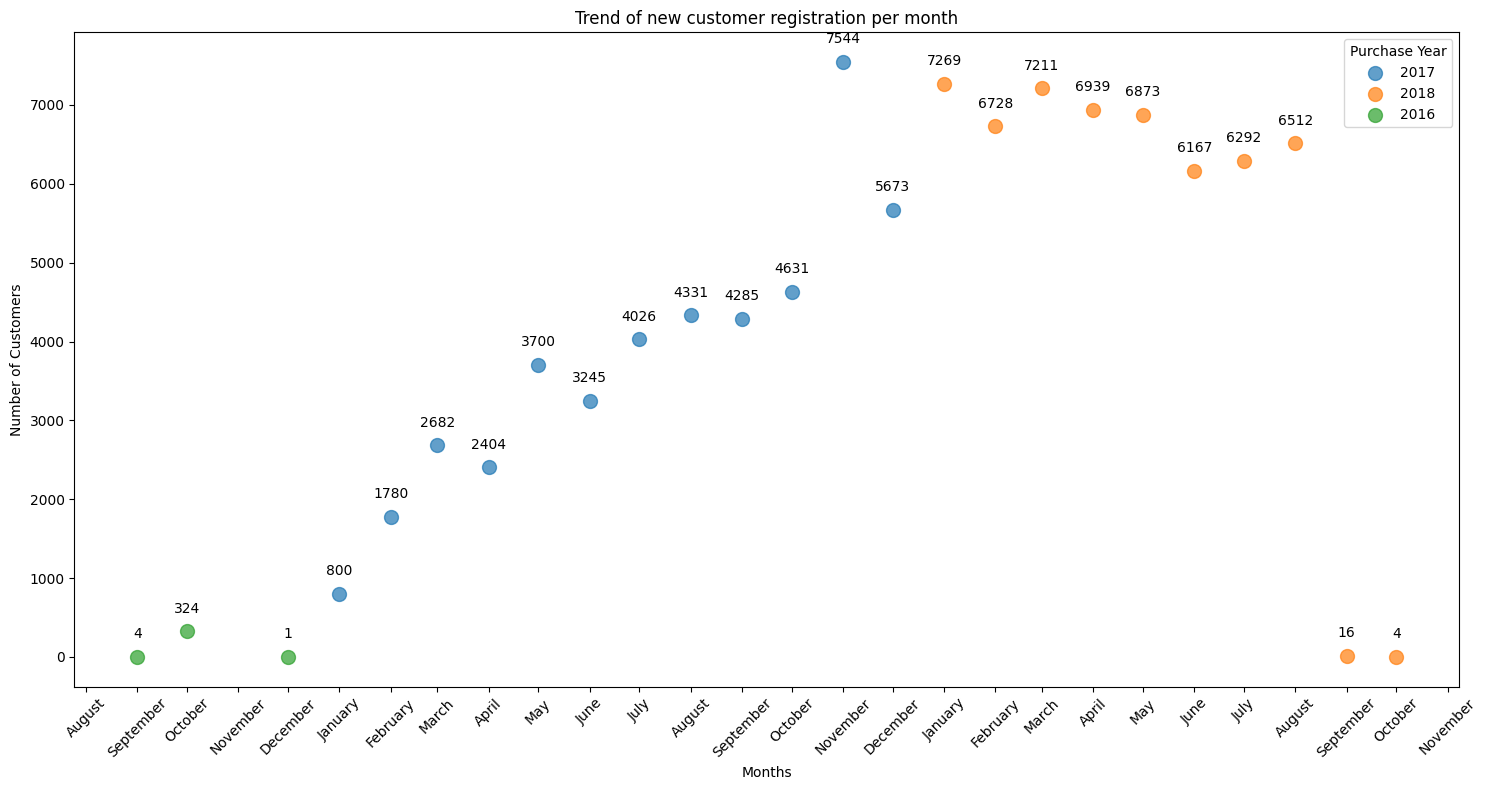

In [9]:
import matplotlib.dates as mdates

# Convert the 'month' and 'year' back to a datetime format for plotting
monthly_customer_trend['date'] = pd.to_datetime(monthly_customer_trend['month'] + ' ' + monthly_customer_trend['year'].astype(str))

# Sort the data by date
monthly_customer_trend_sorted = monthly_customer_trend.sort_values('date')

# Create the scatter plot
plt.figure(figsize=(15, 8))

# Plot each year's data with a different color and label
for i, year in enumerate(unique_years):
    # Filter the data for each year
    yearly_data = monthly_customer_trend_sorted[monthly_customer_trend_sorted['year'] == year]
    plt.scatter(yearly_data['date'], yearly_data['customer_id'], s=100, label=str(year), alpha=0.7)

    # Add text labels for each data point
    for _, row in yearly_data.iterrows():
        plt.text(row['date'], row['customer_id'] + 200,
                 str(int(row['customer_id'])), ha='center', va='bottom')

# Formatting the x-axis to show month names
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%B'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Add labels and title
plt.ylabel('Number of Customers')
plt.xlabel('Months')
plt.title('Trend of new customer registration per month')

# Add legend
plt.legend(title='Purchase Year')

# Show the plot
plt.tight_layout()
plt.show()


page 37 code

In [12]:
# Load the orders dataset
orders_df = pd.read_csv('/content/drive/MyDrive/olist_orders_dataset.csv')

# Load the order reviews dataset
reviews_df = pd.read_excel('/content/drive/MyDrive/olist_order_reviews_dataset_English.xlsx')


# Convert date columns to datetime
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df['order_delivered_carrier_date'] = pd.to_datetime(orders_df['order_delivered_carrier_date'])
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])

# Calculate 'Time to Delivery' as the difference in days between 'order_delivered_customer_date' and 'order_delivered_carrier_date'
orders_df['Time_to_Delivery'] = (orders_df['order_delivered_customer_date'] - orders_df['order_delivered_carrier_date']).dt.total_seconds() / (24 * 3600)

# Merge the datasets on 'order_id'
merged_df = pd.merge(orders_df, reviews_df, on='order_id')

# Group by week of the year from 'order_purchase_timestamp'
merged_df['week_of_year'] = merged_df['order_purchase_timestamp'].dt.isocalendar().week

# Calculate the mean 'review_score' and mean 'Time_to_Delivery' for each week
weekly_data = merged_df.groupby('week_of_year').agg({'review_score':'mean', 'Time_to_Delivery':'mean'}).reset_index()

# Normalize the 'review_score' and 'Time_to_Delivery' for plotting
weekly_data['review_score_normalized'] = (weekly_data['review_score'] - weekly_data['review_score'].min()) / (weekly_data['review_score'].max() - weekly_data['review_score'].min())
weekly_data['Time_to_Delivery_normalized'] = (weekly_data['Time_to_Delivery'] - weekly_data['Time_to_Delivery'].min()) / (weekly_data['Time_to_Delivery'].max() - weekly_data['Time_to_Delivery'].min())

weekly_data.head()


,week_of_year,review_score,Time_to_Delivery,review_score_normalized,Time_to_Delivery_normalized
0,1,4.073868,9.656213,0.661198,0.461458
1,2,4.060638,10.270322,0.642147,0.532278
2,3,3.991313,10.125742,0.542315,0.515604
3,4,3.998979,10.513347,0.553354,0.560303
4,5,4.044295,11.594667,0.618612,0.685002


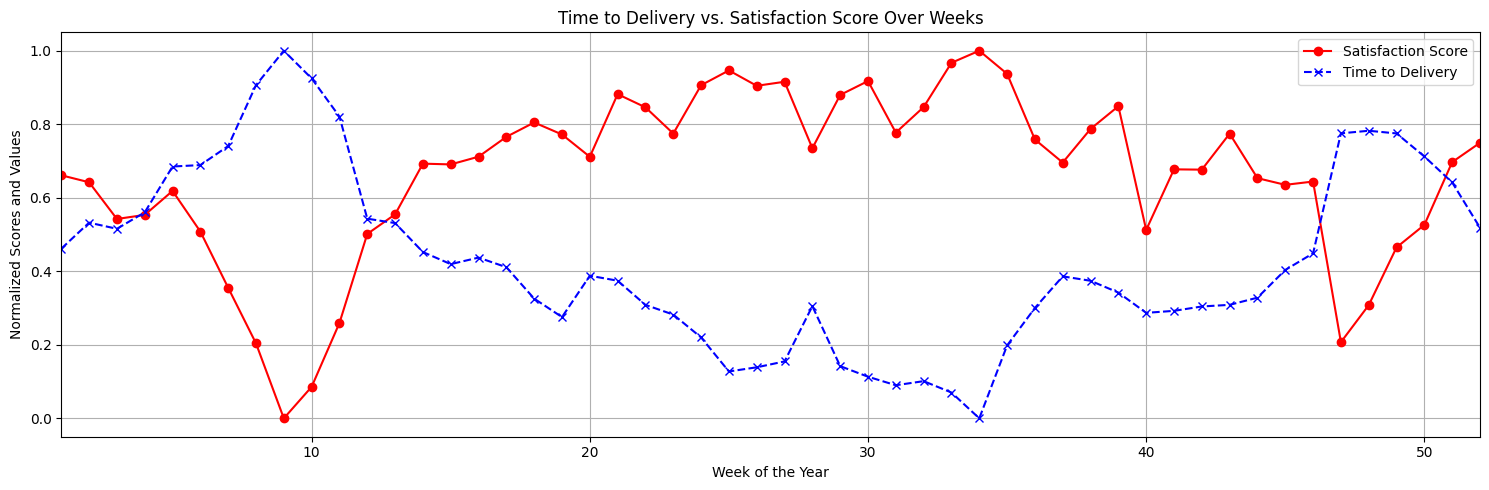

In [13]:
# Plotting the normalized scores and values
plt.figure(figsize=(15, 5))

# Plot Satisfaction Score
plt.plot(weekly_data['week_of_year'], weekly_data['review_score_normalized'],
         'r-', label='Satisfaction Score', marker='o')

# Plot Time to Delivery
plt.plot(weekly_data['week_of_year'], weekly_data['Time_to_Delivery_normalized'],
         'b--', label='Time to Delivery', marker='x')

# Formatting the plot
plt.title('Time to Delivery vs. Satisfaction Score Over Weeks')
plt.xlabel('Week of the Year')
plt.ylabel('Normalized Scores and Values')
plt.legend(loc='best')

# Limit the x-axis to the number of weeks
plt.xlim(1, weekly_data['week_of_year'].max())

# Show grid
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


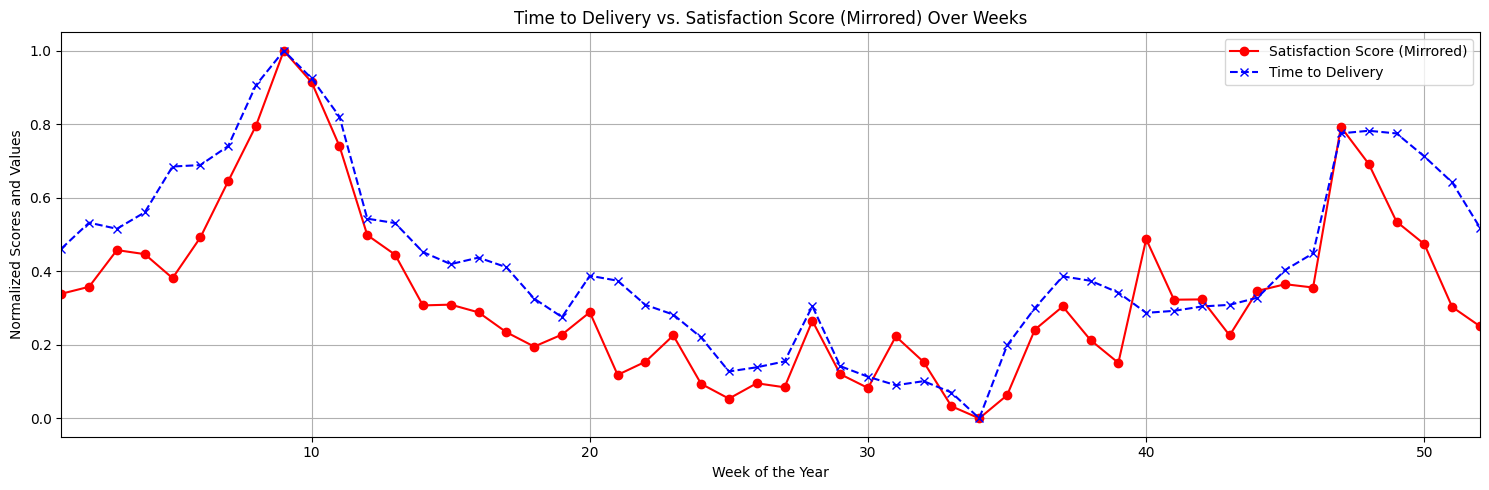

In [14]:
# Mirroring the Satisfaction Score around the y=0.5 axis
weekly_data['review_score_normalized_mirrored'] = 1 - weekly_data['review_score_normalized']

# Plotting the mirrored scores and values
plt.figure(figsize=(15, 5))

# Plot Mirrored Satisfaction Score
plt.plot(weekly_data['week_of_year'], weekly_data['review_score_normalized_mirrored'],
         'r-', label='Satisfaction Score (Mirrored)', marker='o')

# Plot Time to Delivery
plt.plot(weekly_data['week_of_year'], weekly_data['Time_to_Delivery_normalized'],
         'b--', label='Time to Delivery', marker='x')

# Formatting the plot
plt.title('Time to Delivery vs. Satisfaction Score (Mirrored) Over Weeks')
plt.xlabel('Week of the Year')
plt.ylabel('Normalized Scores and Values')
plt.legend(loc='best')

# Limit the x-axis to the number of weeks
plt.xlim(1, weekly_data['week_of_year'].max())

# Show grid
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()
